In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [2]:
# !pip install tensorflow

In [3]:
df=pd.read_csv("F:/Data/Full Stack Data Scientist Bootcamp/NLP/monthly_milk_production.csv",index_col='Date',parse_dates=True)
df.index.freq="MS"

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


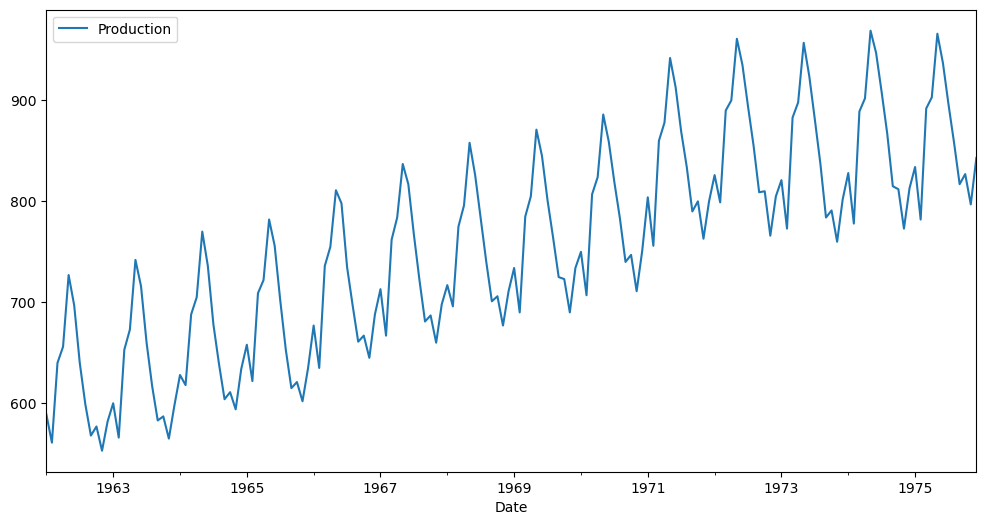

In [5]:
df.plot(figsize=(12,6))

from statsmodels.tsa.seasonal import seasonal_decompose

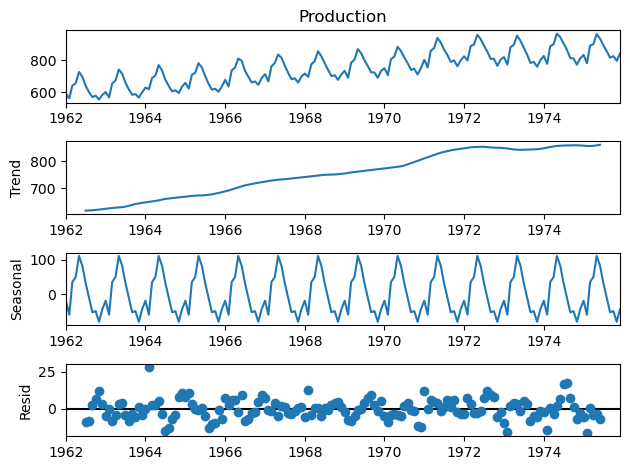

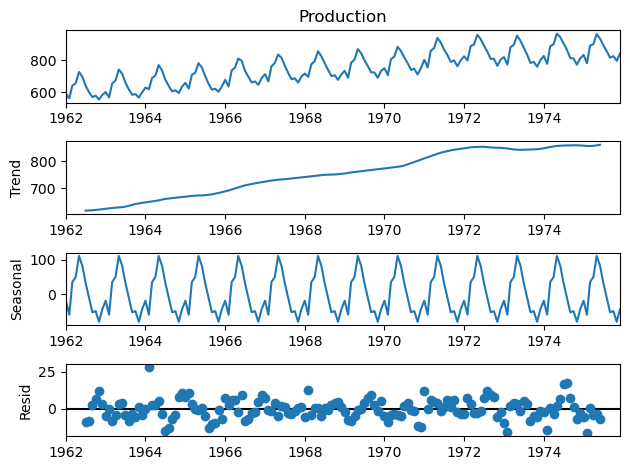

In [6]:
results=seasonal_decompose(df['Production'])
results.plot()

In [7]:
len(df)

168

In [7]:
train=df.iloc[:156]
test=df.iloc[156:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [9]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [10]:
scaled_train[0:4] , scaled_test[0:4]

(array([[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615]]),
 array([[0.67548077],
        [0.55048077],
        [0.81490385],
        [0.84134615]]))

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator

# define genrator 
n_input=3

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
len(generator)

In [ ]:
x,y=generator[150]
print(f'given the array\n {x.flatten()}')
print(f'predict the y\n {y}')

In [ ]:
len(scaled_train)

In [ ]:
scaled_train[150:] 

In [ ]:
# we do the same thing but now instead for 12 month
n_input=12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
len(generator)

In [ ]:
x,y=generator[143]
print(f'given the array\n {x.flatten()}')
print(f'predict the y\n {y}')

In [ ]:
scaled_train[143:] 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model=Sequential()
model.add(LSTM(100,activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
model.fit(generator,epochs=20)

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

###### Making the prediction LSTM

In [ ]:
scaled_train[-12:]

In [ ]:
last_train_batch=scaled_train[-12:]

In [ ]:
last_train_batch

In [ ]:
last_train_batch.shape

In [ ]:
last_train_batch=last_train_batch.reshape((1, n_input, n_features))

In [ ]:
last_train_batch.shape

In [ ]:
model.predict(last_train_batch)

In [ ]:
scaled_test[0]

In [ ]:
scaled_test

In [ ]:
test_predictions=[]
first_eval_batch=scaled_train[-12:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(scaled_test)):
#     get the prediction value for the first bacth
    current_pred=model.predict(current_batch)[0]
#    append the prediction into the array
    test_predictions.append(current_pred)
# use the prediction to update the batch and remove the first value
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [12]:
test_predictions , scaled_test

NameError: name 'test_predictions' is not defined

In [13]:
true_predictions=scaler.inverse_transform(test_predictions)
test['Predictions']=true_predictions

NameError: name 'test_predictions' is not defined

In [14]:
te

NameError: name 'te' is not defined

In [15]:
test['Predictions']

KeyError: 'Predictions'

<AxesSubplot:xlabel='Date'>

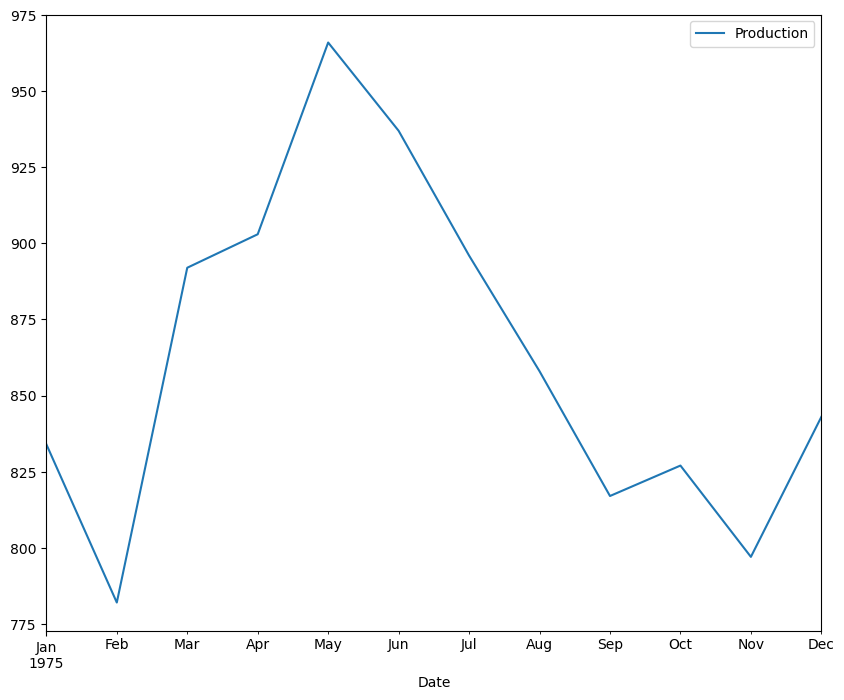

In [16]:
test.plot(figsize=(10,8))

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))

KeyError: 'Predictions'

In [ ]:
print(rmse)

In [18]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
